In [1]:
import numpy as np
import pandas as pd
import json

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Exploration

In [2]:
### Import Data Set
def_cdr_1 = pd.read_csv('data/sms-call-internet-mi-2013-11-01.csv')

In [3]:
# Describe
def_cdr_1.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.891928e+06,1.891928e+06,805775.000000,469482.000000,484147.000000,854515.000000,804854.000000
mean,5.277812e+03,3.538213e+02,5.716717,6.011796,5.417363,3.741025,102.477277
std,2.719573e+03,4.287521e+03,15.503784,16.953823,15.915312,13.986531,342.024253
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.153000e+03,3.300000e+01,0.129300,0.109600,0.075200,0.060700,0.058300
50%,5.387000e+03,4.100000e+01,0.772400,0.755200,0.385000,0.236900,0.230200
75%,7.492000e+03,8.600000e+01,4.468400,4.627375,3.179100,1.206000,42.447725
max,1.000000e+04,9.725900e+04,1109.082000,1577.903800,988.576700,1024.899200,27774.298900


## NaN Filtering

In [4]:
def records_after(def_cdr, cdr, dataset_id):
    len_before, len_after = len(def_cdr), len(cdr)
    print("Dataset {}: \t{} out of {} recordsremaining || {:.2f}% decrease.".format(dataset_id,len_after,len_before, (100*(1- len_after/len_before)))) 

def remove_nans(def_cdr,dataset_id):
    cdr = def_cdr.dropna(axis=0) # Remove records with NaN values
    records_after(def_cdr, cdr, dataset_id)
    return cdr 



In [5]:
### Import remaining data Set
def_cdr_2 = pd.read_csv('data/sms-call-internet-mi-2013-11-02.csv')
def_cdr_3 = pd.read_csv('data/sms-call-internet-mi-2013-11-03.csv')
def_cdr_4 = pd.read_csv('data/sms-call-internet-mi-2013-11-04.csv')
def_cdr_5 = pd.read_csv('data/sms-call-internet-mi-2013-11-05.csv')

In [6]:
# Remove NaN records
cdr_1 = remove_nans(def_cdr_1,1)
cdr_2 = remove_nans(def_cdr_2,2)
cdr_3 = remove_nans(def_cdr_3,3)
cdr_4 = remove_nans(def_cdr_4,4)
cdr_5 = remove_nans(def_cdr_5,5)

Dataset 1: 	233466 out of 1891928 recordsremaining || 87.66% decrease.
Dataset 2: 	224381 out of 1847331 recordsremaining || 87.85% decrease.
Dataset 3: 	225540 out of 1828063 recordsremaining || 87.66% decrease.
Dataset 4: 	227781 out of 2299544 recordsremaining || 90.09% decrease.
Dataset 5: 	231063 out of 2397759 recordsremaining || 90.36% decrease.


## Bar Plot for NaN Removal

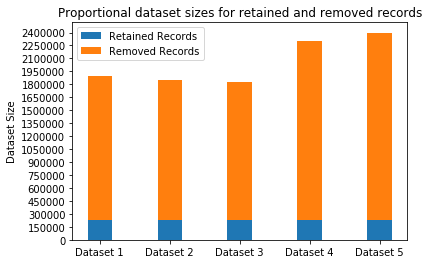

In [7]:
N = 5
removed_records = [(len(def_cdr_1) - len(cdr_1)),
                   (len(def_cdr_2) - len(cdr_2)),
                   (len(def_cdr_3) - len(cdr_3)),
                   (len(def_cdr_4) - len(cdr_4)),
                   (len(def_cdr_5) - len(cdr_5))
                  ]
retained_records =  [ len(cdr_1), len(cdr_2), len(cdr_3), len(cdr_4), len(cdr_5) ]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, retained_records, width)
p2 = plt.bar(ind, removed_records, width,
             bottom=retained_records)

plt.ylabel('Dataset Size')
plt.title('Proportional dataset sizes for retained and removed records')
plt.xticks(ind, ('Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5'))
plt.yticks(np.arange(0, 2500001, 150000))
plt.legend((p1[0], p2[0]), ('Retained Records', 'Removed Records'))

plt.show()

## Dataset Consolidation

In [8]:
datasets = [cdr_1, cdr_2, cdr_3, cdr_4, cdr_5]
main_dataset = pd.concat(datasets)

In [9]:
print("Main dataset length: {}".format(len(main_dataset)))
main_dataset.head()


Main dataset length: 1142231


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
5,2013-11-01 00:00:00,2,39,1.7334,1.0880,0.6020,0.4109,57.8875
8,2013-11-01 00:00:00,3,39,1.7348,1.0701,0.6128,0.4203,58.0095
11,2013-11-01 00:00:00,4,39,1.7284,1.1533,0.5627,0.3763,57.4408
14,2013-11-01 00:00:00,5,39,1.5530,1.0439,0.5110,0.3503,52.1497


In [10]:
main_dataset.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.142231e+06,1.142231e+06,1.142231e+06,1.142231e+06,1.142231e+06,1.142231e+06,1.142231e+06
mean,5.038771e+03,3.941027e+01,1.732318e+01,1.422045e+01,1.615685e+01,1.822883e+01,3.987732e+02
std,2.855317e+03,1.624815e+01,3.952457e+01,3.107215e+01,3.804797e+01,4.238201e+01,7.175173e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.607000e+03,3.900000e+01,1.606500e+00,1.522650e+00,9.684000e-01,1.154400e+00,7.022270e+01
50%,5.075000e+03,3.900000e+01,5.757200e+00,4.953600e+00,4.342700e+00,5.120200e+00,1.823388e+02
75%,7.484000e+03,3.900000e+01,1.729370e+01,1.411790e+01,1.578040e+01,1.792385e+01,4.208914e+02
max,1.000000e+04,7.701000e+03,2.143612e+03,2.037669e+03,1.328088e+03,1.511686e+03,3.174863e+04


In [11]:
## Save Main Dataset
main_dataset.to_csv(path_or_buf="data/main_dataset.csv", index=False)

# 2. Exploratory Visualization

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def calculate_regression_score(feature_name, new_data, target):
    # Split data into training and testing sets (0.25) using the given feature as the target
    # ... and set a random state
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)
    
    #Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(max_depth=5)
    regressor.fit(X_train, y_train)
    
    score = regressor.score(X_test,y_test)
    
    print("{}'s regression score = {} ".format(feature_name, score))
    return score

## Examine feature relevance

In [14]:

featurelist = ['CellID', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet']
scores = []
for feature in featurelist:
    new_data = main_dataset.drop([feature], axis = 1)
    new_data = new_data.drop(['datetime'], axis=1) # not useful
    #new_data = new_data.drop(['index'], axis=1) # not useful\
    target = main_dataset[feature]
    
    score = calculate_regression_score(feature, new_data, target)
    scores.append(score)
    
    

CellID's regression score = 0.22067896413066124 
countrycode's regression score = 0.06971020722242816 
smsin's regression score = 0.9324580704698828 
smsout's regression score = 0.8284548087506232 
callin's regression score = 0.9608945970970592 
callout's regression score = 0.9526242489143089 
internet's regression score = 0.8112173117971802 


In [15]:
scores

[0.22067896413066124,
 0.069710207222428155,
 0.93245807046988283,
 0.82845480875062316,
 0.96089459709705916,
 0.95262424891430886,
 0.81121731179718015]

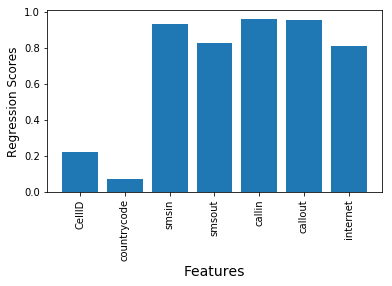

In [16]:
# Plot Bar chart
xfeatures=["CellID", "countrycode", "smsin", "smsout", "callin", "callout", "internet"]
x = np.arange(7)
fig, ax = plt.subplots()
plt.bar(x, scores)
plt.xticks(x, xfeatures, rotation='vertical')
plt.subplots_adjust(bottom=0.25)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Regression Scores', fontsize=12)
plt.show()


## Feature Correlation Heatmap 

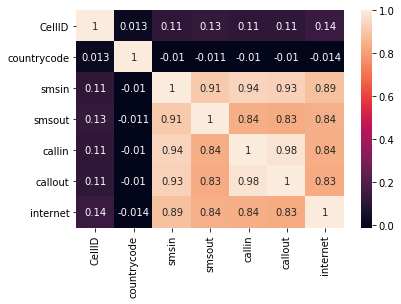

In [17]:
corr = sns.heatmap(main_dataset.corr(), annot=True);
figure = corr.get_figure()    
figure.savefig('images/dataset-correlation.png', dpi=400)